In [1]:
import gym_data_analysis.data_processing as analysis
import yaml
import pandas as pd

In [2]:
print("Starting processing data")
config = None
with open("config.yaml") as f:
    config = yaml.safe_load(f)

raw_df = pd.read_csv(config["input_data"], delimiter=";", parse_dates=['Date'])

# df containing dates, workout names and workout duration
workout_df = raw_df[["Date", "Workout Name", "Workout Duration"]].drop_duplicates()
workout_df['Workout Duration'] = workout_df['Workout Duration'].apply(analysis.parse_duration)
print(workout_df.head())

Starting processing data
                  Date  Workout Name  Workout Duration
0  2023-07-30 16:49:28          Arms                44
18 2023-08-01 16:16:08  Back and abs                43
36 2023-08-03 15:08:07          Legs                50
57 2023-08-05 13:07:31          Arms                50
72 2023-08-06 09:01:55  Back and abs                53


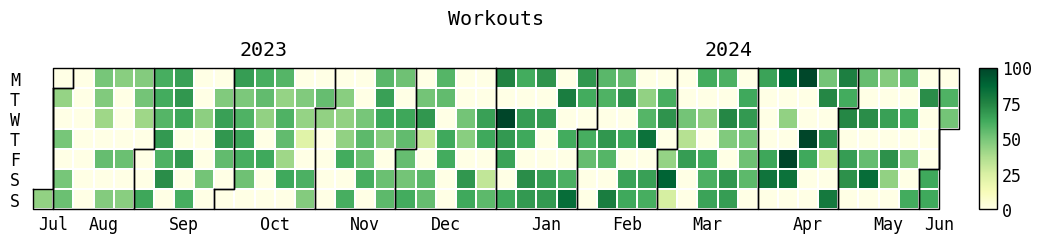

In [3]:
# display heatmap
analysis.plot_workout_heatmap(workout_df)

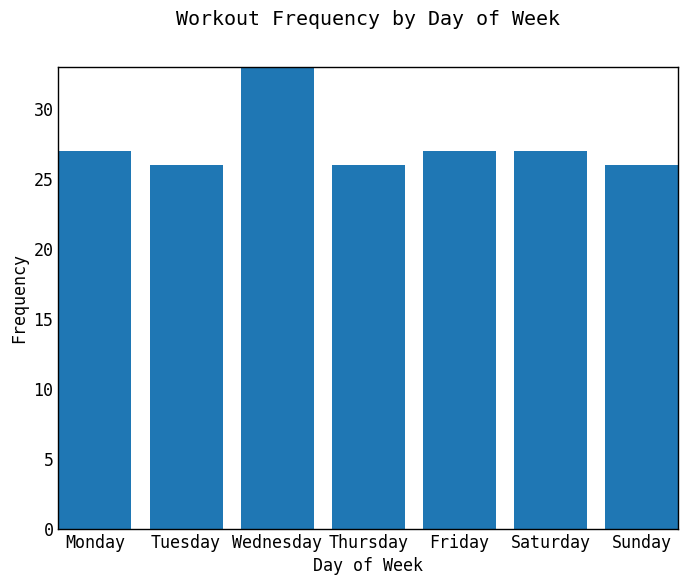

In [4]:
# display workout frequency
analysis.plot_workout_barplot(workout_df)

                  Date  Workout Name  Workout Duration Day of Week WeekNumber
0  2023-07-30 16:49:28          Arms                44      Sunday    2023-30
18 2023-08-01 16:16:08  Back and abs                43     Tuesday    2023-31
36 2023-08-03 15:08:07          Legs                50    Thursday    2023-31
57 2023-08-05 13:07:31          Arms                50    Saturday    2023-31
72 2023-08-06 09:01:55  Back and abs                53      Sunday    2023-31


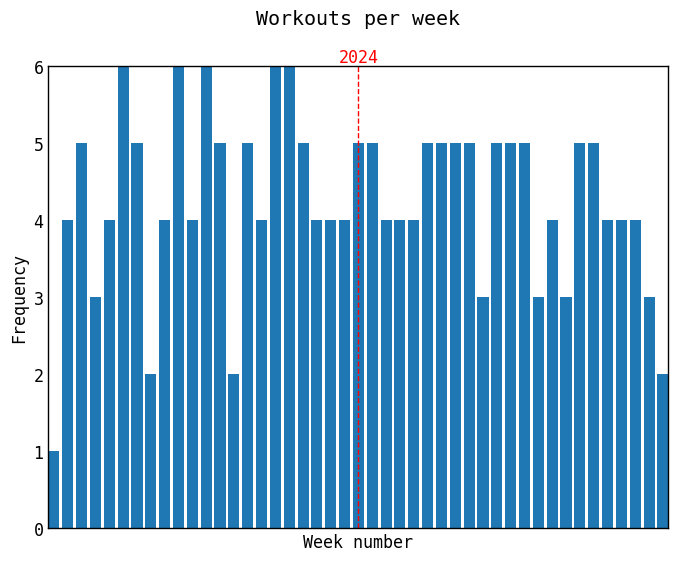

In [5]:
# display weekly workout frequency
analysis.plot_weekly_workout(workout_df)